In [35]:
# tensorflow version
import tensorflow

print("tensorflow: %s" % tensorflow.__version__)
# keras version
import keras

print("keras: %s" % keras.__version__)

tensorflow: 2.12.0
keras: 2.12.0


<h2><span style="color: #ff9900;">pickle</span></h2>

<p><span style="color: #ffff99;">What Pickle does is it &ldquo;serializes&rdquo; the object first before writing it to a file. Pickling is a way to convert a Python object (list, dictionary, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another Python script</span></p>

In [34]:
from os import listdir
from pickle import load
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.image import load_img   ....deprecated
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from keras.utils import pad_sequences
# from keras.preprocessing.image import img_to_array  ...deprecated
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
# from keras.preprocessing.sequence import pad_sequences

In [ ]:
# from keras.applications.vgg16 import VGG16
# model = VGG16(   #all this function is run in colab because imagenet weights are not downloaded in Iran
#                      weights='imagenet',
#                      )
# model.save_weights('VGG16wieghts.h5') #this line of code is also run in colab to save the weights


In [9]:
# model = VGG16(weights=None)

# # we add this part to load the weights manually from already downloaded weights
# model.load_weights(r"D:\CSV original\VGG16wieghts.h5")
# # re-structure the model
# model = Model(inputs=model.inputs, outputs=model.layers[-2].output)	#last but one layer (before last layer which is softmax)

<p><span style="color: #ffff99;"><em><strong>os.listdir()</strong></em>&nbsp;method in python is used to get the list of all files and directories in the specified directory. If we don&rsquo;t specify any directory, then list of files and directories in the current working directory will be returned.</span></p>

<p><span style="color: #ffff99;">vgg16. preprocess_input</span> <span style="color: #99ccff;">will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling. include_top: whether to include the 3 fully-connected layers at the top of the network</span></p>

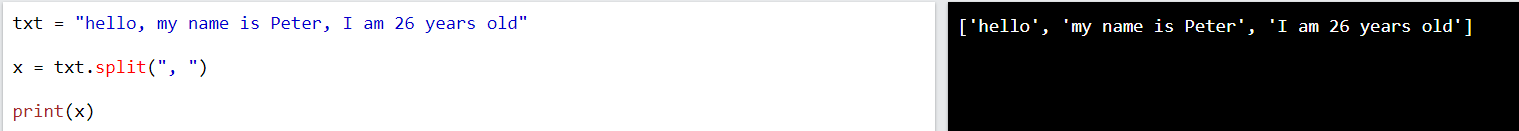

<div>
<h2><span style="color: #ffcc00;">extract_features</span></h2>
</div>
<p><span style="color: #ff99cc;">extracts features(8096 dims output of VGG16) and stores them into a dict named features and returnes them</span></p>

<h4><span style="color: #ffcc99;">Instead, we can pre-compute the &ldquo;photo features&rdquo; using the pre-trained model and save them to file. We can then load these features later and feed them into our model as the interpretation of a given photo in the dataset. It is no different to running the photo through the full VGG model; it is just we will have done it once in advance.</span></h4>

In [36]:
# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    # model = VGG16()
    model = VGG16(weights=None)
    # we add this part to load the weights manually from already downloaded weights
    model.load_weights(r"D:\CSV original\VGG16wieghts.h5")
    # re-structure the model
    model = Model(
        inputs=model.inputs, outputs=model.layers[-2].output
    )  # last but one layer (before last layer which is softmax) which is
    # summarize															#a 4096 one dimentional vector to represent the input image
    print(model.summary())
    # extract features from each photo
    features = dict()
    for name in listdir(directory):
        # load an image from file
        filename = directory + "/" + name
        image = load_img(
            filename, target_size=(224, 224)
        )  # load_img:Loads an image into PIL format,PIL stands for Python Imaging
        # Library, and it's the original library that enabled Python to deal with images
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split(".")[0]
        # store feature
        features[image_id] = feature
        print(">%s" % name)
    return features

<h4><span style="color: #ffcc99;">dump</span></h4>
<p><span style="color: #ffff99;">The Pickle dump() and dumps() functions are used to serialize an object. The only difference between them is that dump() writes the data to a file, while dumps() represents it as a byte object. Similarly, load() reads pickled objects from a file, whereas loads() deserializes them from a bytes-like object</span></p>

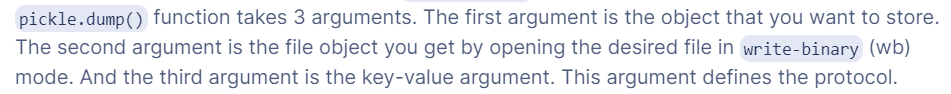

In [5]:
# extract features from all images
directory = "D:/CSV original/flickr8k/Flickr8k_Dataset/Flicker8k_Dataset"
features = extract_features(directory)
print("Extracted Features: %d" % len(features))
# save to file
dump(features, open("features.pkl", "wb"))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<p><span style="color: #ccffcc;">The dataset contains multiple descriptions for each photograph and the text of the descriptions requires some minimal cleaning</span></p>

In [37]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, "r")
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text


filename = "D:/CSV original/flickr8k/Flickr8k_text/Flickr8k.token.txt"
# load descriptions
doc = load_doc(filename)
print(doc)
print(type(doc))

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg#4	A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg#0	A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg#1	A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg#2	A black dog and a white dog with brown spots are staring at each other in the street .
1001773457_577c3a7d70.jpg#3	Two dogs of different breeds looking at each other on the road .
1001773457_577c3a7d70.jpg#4	Two dogs on pavement moving toward each other .
1002674143_1b742ab4b8.jpg#0	A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
1002674143_1b

<p><span style="color: #ccffcc;">Each photo has a unique identifier. This identifier is used on the photo filename and in the text file of descriptions. Next, we will step through the list of photo descriptions. Below defines a function load_descriptions() that, given the loaded document text, will return a dictionary of photo identifiers to descriptions. Each photo identifier maps to a list of one or more textual descriptions</span></p>

In [38]:
# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split("\n"):
        # split line by white space
        tokens = line.split()  # by default the seperator is white space
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # remove filename from image id
        image_id = image_id.split(".")[0]
        # convert description tokens back to string
        image_desc = " ".join(image_desc)
        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()
        # store description
        mapping[image_id].append(image_desc)
    return mapping


# parse descriptions
descriptions = load_descriptions(doc)
print("Loaded: %d " % len(descriptions))

Loaded: 8092 


In [9]:
descriptions


{'1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a gi

<p><span style="color: #cc99ff;">Next, we need to clean the description text. The descriptions are already tokenized and easy to work with.</span></p>
<p><span style="color: #cc99ff;"> We will clean the text in the following ways in order to reduce the size of the vocabulary of words we will need to work with: </span></p>
<ul>
<li><span style="color: #cc99ff;">Convert all words to lowercase.</span></li>
<li><span style="color: #cc99ff;"> Remove all punctuation.</span></li>
<li><span style="color: #cc99ff;"> Remove all words that are one character in length (e.g. &lsquo;a&rsquo;). </span></li>
<li><span style="color: #cc99ff;">Remove all words with numbers in them. </span></li>
</ul>
<p><span style="color: #cc99ff;">Below defines the clean_descriptions() function that, given the dictionary of image identifiers to descriptions, steps through each description and cleans the text</span></p>

in educational movie it is said that vocab is maid using the total unique words available in train text,then every word is mapped to a vector(one hot or integer) 

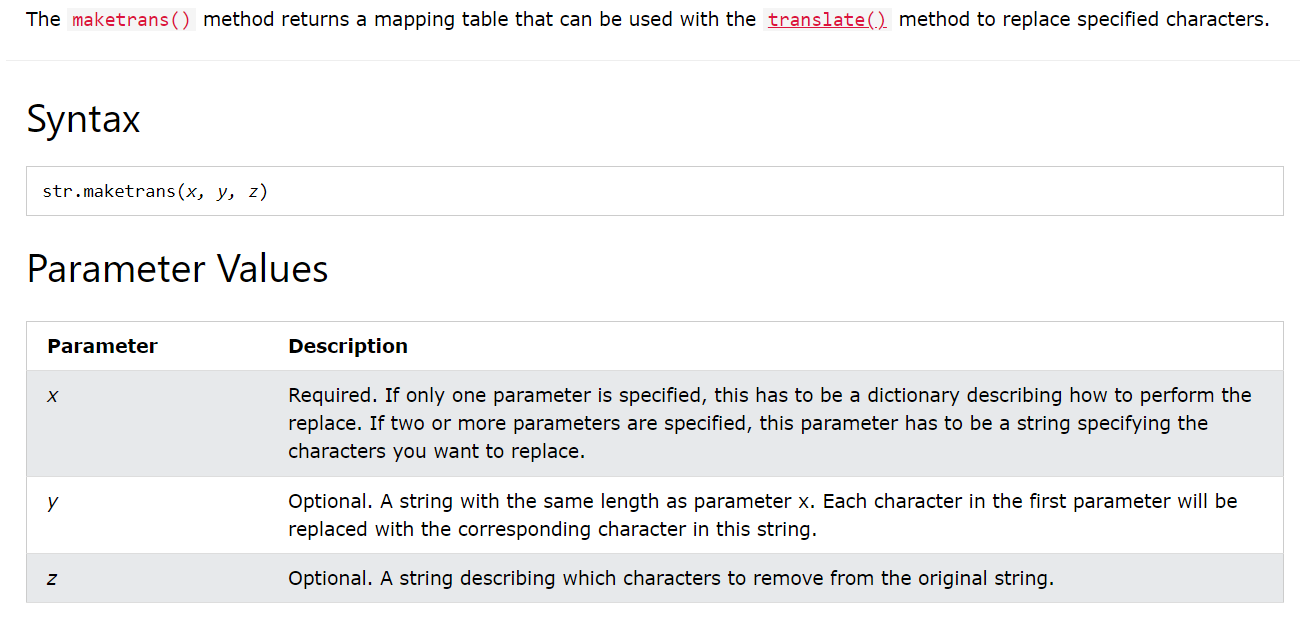

In [39]:
txt = "Hello Sam!"
mytable = str.maketrans("S", "P")
print(txt.translate(mytable))


Hello Pam!


In [40]:
txt = "Hi Sam!"
x = "mSa"
y = "eJo"
mytable = str.maketrans(x, y)
print(txt.translate(mytable))


Hi Joe!


In [41]:
txt = "Good night Sam!"
x = "mSa"
y = "eJo"
z = "odnght"
mytable = str.maketrans(x, y, z)
print(txt.translate(mytable))


G i Joe!


In [42]:
# import string library function
import string

# Storing the sets of punctuation in variable result
result = string.punctuation

# Printing the punctuation values
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [43]:
import string


def clean_descriptions(descriptions):
    # prepare translation table for removing punctuation
    table = str.maketrans("", "", string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize
            desc = desc.split()
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [w.translate(table) for w in desc]
            # remove hanging 's' and 'a'
            desc = [
                word for word in desc if len(word) > 1
            ]  # when punctuation removing is applied ' is removed and a space is left instead of it,then hanging s can be deleted
            # remove tokens with numbers in them
            desc = [
                word for word in desc if word.isalpha()
            ]  # The isalpha() method returns True if all the characters are alphabet letters (a-z)
            # store as string
            desc_list[i] = " ".join(desc)


# clean descriptions
clean_descriptions(descriptions)
descriptions

{'1000268201_693b08cb0e': ['child in pink dress is climbing up set of stairs in an entry way',
  'girl going into wooden building',
  'little girl climbing into wooden playhouse',
  'little girl climbing the stairs to her playhouse',
  'little girl in pink dress going into wooden cabin'],
 '1001773457_577c3a7d70': ['black dog and spotted dog are fighting',
  'black dog and tricolored dog playing with each other on the road',
  'black dog and white dog with brown spots are staring at each other in the street',
  'two dogs of different breeds looking at each other on the road',
  'two dogs on pavement moving toward each other'],
 '1002674143_1b742ab4b8': ['little girl covered in paint sits in front of painted rainbow with her hands in bowl',
  'little girl is sitting in front of large painted rainbow',
  'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it',
  'there is girl with pigtails sitting in front of rainbow painting',
  'young girl with pi

<p><span style="color: #ffcc00;">Once cleaned, we can summarize the size of the vocabulary. Ideally, we want a vocabulary that is both expressive and as small as possible. A smaller vocabulary will result in a smaller model that will train faster. For reference, we can transform the clean descriptions into a set and print its size to get an idea of the size of our dataset vocabulary.</span></p>

In [44]:
dscr = {"ali": ["ali mother fucker", "ali father fucker sun of a bitch"]}
dscr["ali"]

['ali mother fucker', 'ali father fucker sun of a bitch']

In [45]:
sp = dscr["ali"][0].split()
sp

['ali', 'mother', 'fucker']

<ul>
<li><span style="color: #ff00ff;">Python update() function in set adds elements from a set (passed as an argument) to the set. </span></li>
<li><span style="color: #ff00ff;">Syntax : set1.update(set2) </span></li>
<li><span style="color: #ff00ff;">Parameters : Update() method takes any number of argument. The arguments can be a set, list, tuples or a dictionary.</span></li>
<li><span style="color: #ff00ff;">Return value : This method adds set2 to set1 and returns nothing</span></li>
</ul>

In [46]:
# Python program to demonstrate the
# use of update() method

list1 = [1, 2, 3]
list2 = [5, 6, 7]
list3 = [10, 11, 12]

# Lists converted to sets
set1 = set(list1)
set2 = set(list2)

# Update method
set1.update(set2)

# Print the updated set
print(set1)

# List is passed as an parameter which
# gets automatically converted to a set
set1.update(list3)
print(set1)

{1, 2, 3, 5, 6, 7}
{1, 2, 3, 5, 6, 7, 10, 11, 12}


In [47]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc


# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print("Vocabulary Size: %d" % len(vocabulary))

Vocabulary Size: 8763


<p><span style="color: #ffff99;">8763 unique words...</span></p>

<p><span style="color: #ffff99;">Finally, we can save the dictionary of image identifiers and descriptions to a new file named descriptions.txt, with one image identifier and description per line. Below defines the save_descriptions() function that, given a dictionary containing the mapping of identifiers to descriptions and a filename, saves the mapping to file.</span></p>

In [48]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + " " + desc)
    data = "\n".join(lines)
    file = open(filename, "w")
    file.write(data)
    file.close()


# save descriptions
save_descriptions(descriptions, "descriptions.txt")

<p><span style="color: #ffff99;">We are going to train the data on all of the photos and captions in the training dataset. While training, we are going to monitor the performance of the model on the development dataset and use that performance to decide when to&nbsp;<a style="color: #ffff99;" href="https://machinelearningmastery.com/save-load-keras-deep-learning-models/">save models to file</a>.</span></p>
<p><span style="color: #ffff99;">The train and development dataset have been predefined in the&nbsp;<span style="color: #cc99ff;"><em>Flickr_8k.trainImages.txt</em>&nbsp;and&nbsp;<em>Flickr_8k.devImages.txt</em></span>&nbsp;files respectively, that both contain lists of photo file names. From these file names, we can extract the photo identifiers and use these identifiers to filter photos and descriptions for each set.</span></p>
<p><span style="color: #ffff99;">The function&nbsp;<em>load_set()</em>&nbsp;below will load a pre-defined set of identifiers given the train or development sets filename</span></p>

In [49]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split("\n"):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split(".")[0]
        dataset.append(identifier)
    return set(
        dataset
    )  # set() method is used to convert any of the iterable to sequence of iterable elements with distinct elements, commonly called Set

<p><span style="color: #ffcc00;">Now, we can load the photos and descriptions using the pre-defined set of train or development identifiers.</span></p>
<p><span style="color: #ffcc00;">Below is the function&nbsp;<span style="color: #cc99ff;"><em>load_clean_descriptions()</em></span>&nbsp;that loads the cleaned text descriptions from &lsquo;<em>descriptions.txt</em>&lsquo; for a given set of identifiers and returns a dictionary of identifiers to lists of text descriptions.</span></p>
<p><span style="color: #ffcc00;">The model we will develop will generate a caption given a photo, and the caption will be generated one word at a time. The sequence of previously generated words will be provided as input. Therefore, we will need a &lsquo;<em>first word</em>&rsquo; to kick-off the generation process and a &lsquo;<em>last word</em>&lsquo; to signal the end of the caption.</span></p>
<p><span style="color: #ffcc00;">We will use the strings &lsquo;<span style="color: #cc99ff;"><em>startseq</em>&lsquo;</span> and &lsquo;<span style="color: #cc99ff;"><em>endseq</em>&lsquo;</span> for this purpose. These tokens are added to the loaded descriptions as they are loaded. It is important to do this now before we encode the text so that the tokens are also encoded correctly</span></p>

<h2 id="h-create-a-data-generator" class="wp-block-heading"><span style="color: #ff0000;"><strong>Create a Data generator</strong></span></h2>
<p><span style="color: #00ccff;">For training the model as a supervised learning task we need to feed it with input and output sequences. Total 6000 images with 4096 length feature vector and the caption represented as numbers are present in our training sets. It&rsquo;s not possible to hold such a large amount of data into memory so we are going to use a generator method that will yield batches.</span></p>
<p><span style="color: #00ccff;">For example: [x1, x2] are the input of our model, and y act as output, where x1 shows 4096 feature vectors of the image, x2 shows the input text sequence and y shows the output text sequence that is predicted by the model. As in summary for used VGG16 net is shown the output has 4096 neurons. Below there are 5 input to network for this sample caption</span></p>
<figure class="wp-block-table aligncenter">
<table>
<tbody>
<tr>
<td><span style="color: #00ccff;">x1(feature vector)</span></td>
<td><span style="color: #00ccff;">x2(Text sequence)</span></td>
<td><span style="color: #00ccff;">y(word to predict)</span></td>
</tr>
<tr>
<td><span style="color: #00ccff;">feature</span></td>
<td><span style="color: #00ccff;">startseq,</span></td>
<td><span style="color: #00ccff;">two</span></td>
</tr>
<tr>
<td><span style="color: #00ccff;">feature</span></td>
<td><span style="color: #00ccff;">start, two</span></td>
<td><span style="color: #00ccff;">dogs</span></td>
</tr>
<tr>
<td><span style="color: #00ccff;">feature</span></td>
<td><span style="color: #00ccff;">start, two, dogs</span></td>
<td><span style="color: #00ccff;">drink</span></td>
</tr>
<tr>
<td><span style="color: #00ccff;">feature</span></td>
<td><span style="color: #00ccff;">start, two, dogs, drink</span></td>
<td><span style="color: #00ccff;">water</span></td>
</tr>
<tr>
<td><span style="color: #00ccff;">feature</span></td>
<td><span style="color: #00ccff;">start, two, dogs, drink, water</span></td>
<td><span style="color: #00ccff;">endseq</span></td>
</tr>
</tbody>
</table>
</figure>

In [50]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split("\n"):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = "startseq " + " ".join(image_desc) + " endseq"
            # store
            descriptions[image_id].append(desc)
    return descriptions

<p><span style="color: #00ffff;">Next, we can load the photo features for a given dataset.</span></p>
<p><span style="color: #00ffff;">Below defines a function named&nbsp;<span style="color: #ff9900;"><em>load_photo_features()</em></span>&nbsp;that loads the entire set of photo descriptions, then returns the subset of interest for a given set of photo identifiers.</span></p>
<p><span style="color: #00ffff;">This is not very efficient; nevertheless, this will get us up and running quickly.</span></p>

<p><span style="color: #ffff99;">The <span style="color: #99ccff;">open()</span> function opens a file in text format by default. To open a file in binary format,&nbsp;<strong>add 'b' to the mode parameter</strong>. Hence the "rb" mode opens the file in binary format for reading, while the "wb" mode opens the file in binary format for writing. Unlike text files, binary files are not human-readable</span></p>

<p><span style="color: #99cc00;"><code>load() is used to load arrays or pickled objects from files with . npy , and . npz extensions to volatile memory or program. Pickling is a process in which Python objects are converted into streams of bytes to store data in file.  pkl</code>&nbsp;file is, in fact, a serialized&nbsp;<code>pickle</code>&nbsp;file, which means it has been dumped using Python's&nbsp;<a style="color: #99cc00;" href="https://docs.python.org/3/library/pickle.html" rel="noreferrer"><code>pickle</code></a>&nbsp;module.</span></p>
<p><span style="color: #99cc00;">To un-pickle the data you can:</span></p>
<pre class="lang-py s-code-block"><span style="color: #99ccff;"><code class="hljs language-python"><span class="hljs-keyword">import</span> pickle


<span class="hljs-keyword">with</span> <span class="hljs-built_in">open</span>(<span class="hljs-string">'serialized.pkl'</span>, <span class="hljs-string">'rb'</span>) <span class="hljs-keyword">as</span> f:
    data = pickle.load(f)</code></span></pre>

In [51]:
# load photo features
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, "rb"))
    # filter features
    features = {k: all_features[k] for k in dataset}
    # print('all_features[10]',all_features[10])
    return features

In [52]:
# load training dataset (6K)
filename = "D:/CSV original/flickr8k\Flickr8k_text/Flickr_8k.trainImages.txt"
train = load_set(
    filename
)  # load_set returnes a set,here it returnes a set consisting of just names(without jpg extension) of train images IDs.
print("Dataset: %d" % len(train))
print("train:", train)
# descriptions
train_descriptions = load_clean_descriptions(
    "descriptions.txt", train
)  # load_clean_descriptions retunes a dict,keys=IDs loaded from train,values:list consisting of
# different captions for every ID
print("Descriptions: train=%d" % len(train_descriptions))
print("train_descriptions:", train_descriptions)
# photo features
train_features = load_photo_features("C:/Users/Mahdi/Desktop/machine learning projects for beginners/deep/image captioning/features.pkl", train)    #train_features is a dict
                                                                                                                                #keys:train IDs,values:related feature
print("Photos: train=%d" % len(train_features))

Dataset: 6000
train: {'408627152_1feaa4b94e', '3249597269_935e0a375a', '3164347907_2813f8ff0b', '2711075591_f3ee53cfaa', '2092419948_eea8001d0f', '2730819220_b58af1119a', '3323419265_7fefaa9d5d', '2661489896_cc3425777e', '3215238223_29de2b35cb', '3331190056_09f4ca9fd2', '2830309113_c79d7be554', '3016200560_5bf8a70797', '2938072630_d641b63e4d', '544301311_5e7d69a517', '3027850131_a7772e0ba0', '3112821789_1f7c3bbb99', '2636876892_9353521a1c', '2860041212_797afd6ccf', '428796930_476a3d6395', '3268443910_b36dbc1e5c', '2486364531_b482d7f521', '3708748633_e7e3cf4e84', '411011549_1298d2b4d2', '2780031669_a0345cfc26', '2952320230_26601173be', '437054333_5c2761b8cd', '3471463779_64084b686c', '3593538248_dffa1a5ed4', '2090723611_318031cfa5', '211277478_7d43aaee09', '477254932_56b48d775d', '3542418447_7c337360d6', '2271890493_da441718ba', '2171891283_dedd9cf416', '2640000969_b5404a5143', '3087095548_6df7c2a8ed', '2191453879_11dfe2ba3a', '233327292_3bcbc3783f', '733964952_69f011a6c4', '399212516_d

<p><span style="color: #ffff99;">The description text will need to be encoded to numbers before it can be presented to the model as in input or compared to the model&rsquo;s predictions.</span></p>
<p><span style="color: #ffff99;">The first step in encoding the data is to create a consistent mapping from words to unique integer values. Keras provides the&nbsp;<span style="color: #99ccff;"><em>Tokenizer</em>&nbsp;</span>class that can learn this mapping from the loaded description data.</span></p>
<p><span style="color: #ffff99;">Below defines the&nbsp;<span style="color: #99ccff;"><em>to_lines()</em></span>&nbsp;to convert the dictionary of descriptions into a list of strings and the&nbsp;<span style="color: #99ccff;"><em>create_tokenizer()</em></span>&nbsp;function that will fit a Tokenizer given the loaded photo description text.</span></p>

<ol>
<li><span style="color: #ff0000;"><code>fit_on_texts</code></span>&nbsp;<span style="color: #ffff99;"><em>Updates internal vocabulary based on a list of texts.</em>&nbsp;This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary</span> <span style="color: #ffff99;">s.t.</span>&nbsp;<code><span style="color: #ff0000;">word_index["the"]</span> <span style="color: #ffff99;">= 1;</span> <span style="color: #ff0000;">word_index["cat"]</span> <span style="color: #ffff99;">= 2</span></code>&nbsp;<span style="color: #ffff99;">it is word -&gt; index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).</span></li>
<li><span style="color: #ff0000;"><code>texts_to_sequences</code></span>&nbsp;<span style="color: #ffff99;"><em>Transforms each text in texts to a sequence of integers.</em>&nbsp;So it basically takes each word in the text and replaces it with its corresponding integer value from the</span>&nbsp;<span style="color: #ff0000;"><code>word_index</code></span><span style="color: #ffff99;">&nbsp;dictionary. Nothing more, nothing less, certainly no magic involved.</span></li>
</ol>
<p><span style="color: #ffff99;"><strong>Why don't combine them?</strong>&nbsp;Because you almost always fit&nbsp;<em>once</em>&nbsp;and convert to sequences&nbsp;<em>many times</em>. You will fit on your training corpus once and use that exact same&nbsp;</span><span style="color: #ff0000;"><code>word_index</code></span>&nbsp;<span style="color: #ffff99;">dictionary at train / eval / testing / prediction time to convert actual text into sequences to feed them to the network. So it makes sense to keep those methods separate.</span></p>

<ol>
<li><span style="color: #99ccff;"><strong>Example 1</strong>:</span></li>
</ol>

In [53]:
t  = Tokenizer()
fit_text = "The earth is an awesome place live"
t.fit_on_texts(fit_text)
test_text = "The earth is an great place live"
sequences = t.texts_to_sequences(test_text)

print("sequences : ",sequences,'\n')

print("word_index : ",t.word_index)
#[] specifies : 1. space b/w the words in the test_text    2. letters that have not occured in fit_text

sequences :  [[3], [4], [1], [], [1], [2], [8], [3], [4], [], [5], [6], [], [2], [9], [], [], [8], [1], [2], [3], [], [13], [7], [2], [14], [1], [], [7], [5], [15], [1]] 

word_index :  {'e': 1, 'a': 2, 't': 3, 'h': 4, 'i': 5, 's': 6, 'l': 7, 'r': 8, 'n': 9, 'w': 10, 'o': 11, 'm': 12, 'p': 13, 'c': 14, 'v': 15}


<p><span style="color: #99ccff;"><strong>Example 2</strong>:</span></p>

In [55]:
t  = Tokenizer()
fit_text = ["The earth is an awesome place live"]
t.fit_on_texts(fit_text)

#fit_on_texts fits on sentences when list of sentences is passed to fit_on_texts() function. 
#ie - fit_on_texts( [ sent1, sent2, sent3,....sentN ] )

#Similarly, list of sentences/single sentence in a list must be passed into texts_to_sequences.
test_text1 = "The earth is an great place live"
test_text2 = "The is my program"
sequences = t.texts_to_sequences([test_text1, test_text2])

print('sequences : ',sequences,'\n')

print('word_index : ',t.word_index)
#texts_to_sequences() returns list of list. ie - [ [] ]

sequences :  [[1, 2, 3, 4, 6, 7], [1, 3]] 

word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


<p><span style="color: #ccffff;">You see what happened here. The word "great" is not fit initially, so it does not recognize the word "great". Meaning, fit_on_text can be used independently on train data and then the fitted vocabulary index can be used to represent a completely new set of word sequence. These are two different processes</span></p>

In [56]:
# convert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)	#list of sentences is passed to fit_on_texts function, so words are indexed based on how often they occure in text corpus
	return tokenizer


In [57]:

# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
print('word index:', tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

word index: {'startseq': 1, 'endseq': 2, 'in': 3, 'the': 4, 'on': 5, 'is': 6, 'and': 7, 'dog': 8, 'with': 9, 'man': 10, 'of': 11, 'two': 12, 'white': 13, 'black': 14, 'boy': 15, 'are': 16, 'woman': 17, 'girl': 18, 'to': 19, 'wearing': 20, 'at': 21, 'people': 22, 'water': 23, 'brown': 24, 'young': 25, 'red': 26, 'an': 27, 'his': 28, 'blue': 29, 'dogs': 30, 'running': 31, 'through': 32, 'playing': 33, 'while': 34, 'down': 35, 'shirt': 36, 'ball': 37, 'standing': 38, 'little': 39, 'grass': 40, 'snow': 41, 'child': 42, 'person': 43, 'jumping': 44, 'over': 45, 'three': 46, 'sitting': 47, 'front': 48, 'field': 49, 'holding': 50, 'small': 51, 'yellow': 52, 'green': 53, 'group': 54, 'up': 55, 'by': 56, 'large': 57, 'one': 58, 'walking': 59, 'her': 60, 'men': 61, 'children': 62, 'air': 63, 'into': 64, 'near': 65, 'mouth': 66, 'beach': 67, 'jumps': 68, 'runs': 69, 'another': 70, 'for': 71, 'street': 72, 'from': 73, 'its': 74, 'riding': 75, 'stands': 76, 'bike': 77, 'girls': 78, 'as': 79, 'outsid

<p><span style="color: #cc99ff;">We can now encode the text. Each description will be split into words. The model will be provided one word and the photo and generate the next word. Then the first two words of the description will be provided to the model as input with the image to generate the next word. This is how the model will be trained. For example, the input sequence &ldquo;little girl running in field&rdquo; would be split into 6 input-output pairs to train the model:</span></p>

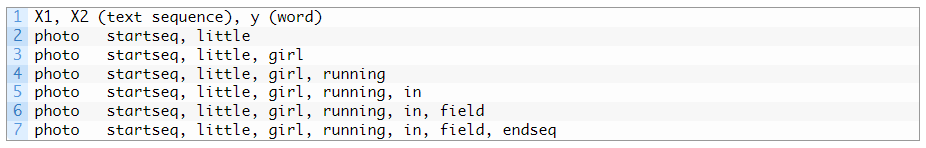

<p><span style="color: #00ffff;">Later, when the model is used to generate descriptions, the generated words will be concatenated and recursively provided as input to generate a caption for an image.</span></p>
<p><span style="color: #00ffff;">The function below named&nbsp;<em>create_sequences()</em>, given the tokenizer, a maximum sequence length, and the dictionary of all descriptions and photos, will transform the data into input-output pairs of data for training the model. There are two input arrays to the model: one for photo features and one for the encoded text. There is one output for the model which is the encoded next word in the text sequence.</span></p>
<p><span style="color: #00ffff;">The input text is encoded as integers, which will be fed to a word embedding layer. The photo features will be fed directly to another part of the model. The model will output a prediction, which will be a probability distribution over all words in the vocabulary.</span></p>
<p><span style="color: #00ffff;">The output data will therefore be a one-hot encoded version of each word, representing an idealized probability distribution with 0 values at all word positions except the actual word position, which has a value of 1.</span></p>

<h3><span style="color: #ff0000;">tf.keras.preprocessing.sequence.pad_sequences</span></h3>
<pre class="prettyprint language-python language-python" data-language="python"><span style="color: #00ccff;">tf<span class="token punctuation">.</span>keras<span class="token punctuation">.</span>preprocessing<span class="token punctuation">.</span>sequence<span class="token punctuation">.</span>pad_sequences<span class="token punctuation">(</span>
    sequences<span class="token punctuation">,</span>
    maxlen<span class="token operator">=</span><span class="token boolean">None</span><span class="token punctuation">,</span>
    dtype<span class="token operator">=</span><span class="token string">'int32'</span><span class="token punctuation">,</span>
    padding<span class="token operator">=</span><span class="token string">'pre'</span><span class="token punctuation">,</span>
    truncating<span class="token operator">=</span><span class="token string">'pre'</span><span class="token punctuation">,</span>
    value<span class="token operator">=</span><span class="token number">0.0</span>
<span class="token punctuation">)</span></span></pre>
<p><span style="color: #00ccff;">Pads sequences to the same length.</span></p>
<p><span style="color: #00ccff;">This function transforms a list of&nbsp;<code>num_samples</code>&nbsp;sequences (lists of integers) into a 2D Numpy array of shape&nbsp;<code>(num_samples, num_timesteps)</code>.&nbsp;<code>num_timesteps</code>&nbsp;is either the&nbsp;<code>maxlen</code>&nbsp;argument if provided, or the length of the longest sequence otherwise.</span></p>
<p><span style="color: #00ccff;">Sequences that are shorter than&nbsp;<code>num_timesteps</code>&nbsp;are padded with&nbsp;<code>value</code>&nbsp;at the end.</span></p>
<p><span style="color: #00ccff;">Sequences longer than&nbsp;<code>num_timesteps</code>&nbsp;are truncated so that they fit the desired length. The position where padding or truncation happens is determined by the arguments&nbsp;<code>padding</code>&nbsp;and&nbsp;<code>truncating</code>, respectively.</span></p>
<p><span style="color: #00ccff;">Pre-padding is the default.</span></p>
<ul>
<li><span style="color: #ffffff;"><strong><code>sequences</code></strong>: List of lists, where each element is a sequence.</span></li>
<li><span style="color: #ffffff;"><strong><code>maxlen</code></strong>: Int, maximum length of all sequences.</span></li>
<li><span style="color: #ffffff;"><strong><code>dtype</code></strong>: Type of the output sequences.</span></li>
<li><span style="color: #ffffff;"><strong><code>padding</code></strong>: String, 'pre' or 'post': pad either before or after each sequence.</span></li>
<li><span style="color: #ffffff;"><strong><code>truncating</code></strong>: String, 'pre' or 'post': remove values from sequences larger than&nbsp;<code>maxlen</code>, either at the beginning or at the end of the sequences.</span></li>
</ul>
<h4 id="returns"><span style="color: #ffff99;">Returns:</span></h4>
<ul>
<li><span style="color: #ffff99;"><strong><code>x</code></strong>: Numpy array with shape&nbsp;<code>(len(sequences), maxlen)</code></span></li>
</ul>
<pre class="prettyprint language-python language-python" data-language="python">&nbsp;</pre>

In [58]:

a = to_categorical([15], num_classes=20)
print(a)
a = to_categorical([18], num_classes=20)[0]
print(a)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


index 15 and index 18 are set to 1 !!!!

In [59]:
a = pad_sequences([[12,23]], maxlen=20)
a

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 12, 23]])

<p><span style="color: #ffff99;">Array is a container which can hold a fix number of items and these items should be of the same type. Most of the data structures make use of arrays to implement their algorithms</span></p>

In [60]:
import numpy as np
a=[1,2,3]
arr=np.array(a)
print(arr)

[1 2 3]


In [61]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
	# X1 will contain photo
	# X2 will contain current sequence
	# y will contain one hot encoded next word	
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]	#seq equals to the list of integers in this sentence,tokenizer.texts_to_sequences([desc])=[[integers]]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]	#pad_sequences([in_seq], maxlen=max_length) is a 2D numpy array,[0] is 
				#														needed to take out padded list itself
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]	#out_seq is an integer and index equivalent to out_seq is set to one,[0] is needed 
				#																											look at the example code above
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)

<p><span style="color: #ff9900;">We will need to calculate the maximum number of words in the longest description. A short helper function named&nbsp;<em>max_length()</em>&nbsp;is defined below.</span></p>

In [62]:
# calculate the length of the description with the most words
#descriptions:dictionary keys:image IDs,values:list consisting of 5 items which are 5 comments for image
def max_length(descriptions):
	lines = to_lines(descriptions)	## convert a dictionary of clean descriptions to a list of descriptions
	return max(len(d.split()) for d in lines)	#.split() returnes a list

<p><span style="color: #808080;">We now have enough to load the data for the training and development datasets and transform the loaded data into input-output pairs for fitting a deep learning model.</span></p>

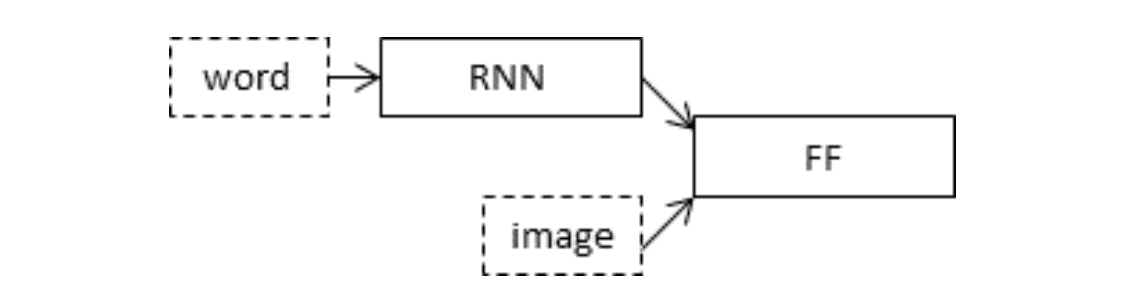

<ul>
<li><span style="color: #ff9900;">Photo Feature Extractor. This is a 16-layer VGG model pre-trained on the ImageNet dataset. We have pre-processed the photos with the VGG model (without the output layer) and will use the extracted features predicted by this model as input. input is 4096 long features</span></li>
<li><span style="color: #ff9900;">Sequence Processor. This is a word embedding layer for handling the text input, followed by a Long Short-Term Memory (LSTM) recurrent neural network layer.converts integers resulted from words to 256 long word embedding.</span></li>
<li><span style="color: #ff9900;"> Decoder (for lack of a better name). Both the feature extractor and sequence processor output a fixed-length vector. These are merged together and processed by a Dense layer to make a final prediction.</span></li>
</ul>

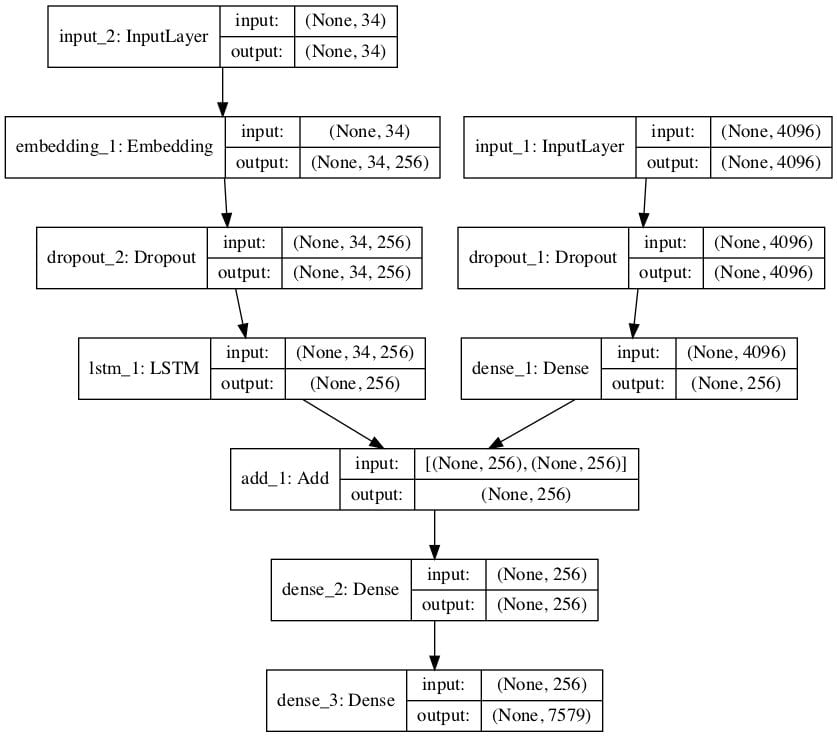

<ul>
<li><span style="color: #ffff00;">34 is length of captions(all are padded to make 34 long captions)</span></li>
<li><span style="color: #ffff00;">embedding layer makes 34*256 embedding code for them</span></li>
<li><span style="color: #ffff00;">h for LSTM is 256 long, and LSTM calculates output of every embedded 34 words and inputs it to another LSTM until ultimate output which is last h with 256 length is input to decoder part</span></li>
<li>
<p><span style="color: #ffff00;">The Photo Feature Extractor model expects input photo features to be a vector of 4,096 elements. These are processed by a Dense layer to produce a 256 element representation of the photo.</span></p>
<p><span style="color: #ffff00;">The Sequence Processor model expects input sequences with a pre-defined length (34 words) which are fed into an Embedding layer that uses a mask to ignore padded values. This is followed by an LSTM layer with 256 memory units.</span></p>
<p><span style="color: #ffff00;">Both the input models produce a 256 element vector. Further, both input models use regularization in the form of 50% dropout. This is to reduce overfitting the training dataset, as this model configuration learns very fast.</span></p>
<p><span style="color: #ffff00;">The Decoder model merges the vectors from both input models using an addition operation. This is then fed to a Dense 256 neuron layer and then to a final output Dense layer that makes a softmax prediction over the entire output vocabulary for the next word in the sequence.</span></p>
<p><span style="color: #ffff00;">The function below named&nbsp;<em>define_model()</em>&nbsp;defines and returns the model ready to be fit</span></p>
</li>
</ul>

<ul>
<li><span style="color: #ff0000;"><strong>mask_zero</strong></span>:<span style="color: #ffff99;"> Boolean, whether or not the input value 0 is a special "padding" value that should be masked out. This is useful when using recurrent layers which may take variable length input. If this is&nbsp;<code>True</code>, then all subsequent layers in the model need to support masking or an exception will be raised. If mask_zero is set to True, as a consequence, index 0 cannot be used in the vocabulary</span> <span style="color: #ff0000;">(input_dim should equal size of vocabulary + 1).</span></li>
</ul>

In [63]:
# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(4096,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	print(model.summary())
	plot_model(model, to_file='model.png', show_shapes=True)
	return model

<p><span style="color: #808080;">we will monitor the skill of the trained model on the holdout development dataset. When the skill of the model on the development dataset improves at the end of an epoch, we will save the whole model to file</span></p>

<p><span style="color: #00ffff;">At the end of the run, we can then use the saved model with the best skill on the training dataset as our final model. We can do this by defining a ModelCheckpoint in Keras and specifying it to monitor the minimum loss on the validation dataset and save the model to a file that has both the training and validation loss in the filename.</span></p>

In [32]:
from keras.callbacks import ModelCheckpoint
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

<p><span style="color: #ffcc99;">We can then specify the checkpoint in the call to fit() via the callbacks argument. We must also specify the development dataset in fit() via the validation_data argument. We will only fit the model for 20 epochs, but given the amount of training data, each epoch may take 30 minutes on modern hardware.</span></p>

In [37]:
from numpy import array
from keras.utils import plot_model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
# from keras.layers.merge import add
from keras.layers import add 

# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size)

# dev dataset

# load test set
filename = 'D:/CSV original/flickr8k/Flickr8k_text/Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features, vocab_size)

# fit model

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
model.fit([X1train, X2train], ytrain, epochs=20, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 256)      1940224     ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 4096)         0           ['input_1[0][0]']                
               

KeyboardInterrupt: 

<h1><span style="color: #00ff00;">evaluation</span></h1>
<p><span style="color: #ffff99;">First, we need to be able to generate a description for a photo using a trained model.This involves passing in the start description token &lsquo;<span style="color: #cc99ff;"><em>startseq</em></span>&lsquo;, generating one word, then calling the model recursively with generated words as input until the end of sequence token is reached &lsquo;<span style="color: #cc99ff;"><em>endseq</em></span>&lsquo; or the <span style="color: #cc99ff;">maximum</span> description length is reached.</span></p>

<p><span style="color: #ffcc99;">The function below named&nbsp;<em>generate_desc()</em>&nbsp;implements this behavior and generates a textual description given a trained model, and a given prepared photo as input. It calls the function&nbsp;<em>word_for_id()</em>&nbsp;in order to map an integer prediction back to a word.</span></p>

In [64]:
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():	#word_index is a dict in which keys are words, values are their integers
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

<p><span style="color: #00ffff;">We will generate predictions for all photos in the test dataset and in the train dataset. The function below named <span style="color: #ff9900;">evaluate_model()</span> will evaluate a trained model against a given dataset of photo descriptions and photo features. The actual and predicted descriptions are collected and evaluated collectively using the corpus <span style="color: #ff9900;">BLEU</span> score that summarizes how close the generated text is to the expected text.</span></p>

<p><span style="color: #ccffff;"><span style="color: #ff0000;">BLEU</span> (BiLingual Evaluation Understudy) is a metric for automatically evaluating machine-translated text. The BLEU score is&nbsp;<strong>a number between zero and one that measures the similarity of the machine-translated text to a set of high quality reference translations</strong>.in measures the similarity between machine generated text and human written text.the closer the value is to 1 the better is g enerated text</span></p>

In [65]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

<p><span style="color: #ffff99;">Here, we compare each generated description against all of the reference descriptions for the photograph. We then calculate BLEU scores for 1, 2, 3 and 4 cumulative n-grams</span></p>

<p><span style="color: #ffff99;">The&nbsp;<a style="color: #ffff99;" href="http://www.nltk.org/api/nltk.translate.html">NLTK Python library implements the BLEU score</a>&nbsp;calculation in the&nbsp;<em>corpus_bleu()</em>&nbsp;function. A higher score close to 1.0 is better, a score closer to zero is worse.</span></p>

<p><span style="color: #99cc00;">We can put all of this together with the functions from the previous section for loading the data. We first need to load the training dataset in order to prepare a Tokenizer so that we can encode generated words as input sequences for the model. It is critical that we encode the generated words using exactly the same encoding scheme as was used when training the model.</span></p>

In [71]:
from keras.models import load_model
from numpy import argmax
from nltk.translate.bleu_score import corpus_bleu
# prepare test set
# max_length = max_length(train_descriptions) 
max_length =34
# load test set
filename = 'D:/CSV original/flickr8k/Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
 
# load the model
filename = 'model-ep003-loss3.626-val_loss3.877.h5'
model = load_model(filename)    #Loads a model saved via model.save()
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.498524
BLEU-2: 0.260068
BLEU-3: 0.178796
BLEU-4: 0.080374


<p><span style="color: #ffcc99;">We also need the Tokenizer for encoding generated words for the model while generating a sequence, and the maximum length of input sequences, used when we defined the model (e.g. 34).</span></p>
<p><span style="color: #ffcc99;">We can hard code the maximum sequence length. With the encoding of text, we can create the tokenizer and save it to a file so that we can load it quickly whenever we need it without needing the entire Flickr8K dataset. An alternative would be to use our own vocabulary file and mapping to integers function during training.</span></p>
<p><span style="color: #ffcc99;">We can create the Tokenizer as before and save it as a pickle file&nbsp;<em>tokenizer.pkl</em>. The complete example is listed below.</span></p>

In [72]:
# load training dataset (6K)
filename = 'D:/CSV original/flickr8k/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

Dataset: 6000
Descriptions: train=6000


<p><span style="color: #ccffcc;">We can now load the tokenizer whenever we need it without having to load the entire training dataset of annotations.</span></p>
<p><span style="color: #ccffcc;">Now, let&rsquo;s generate a description for a new photograph.</span></p>

<p><span style="color: #00ccff;">First, we must load the Tokenizer from tokenizer.pkl and define the maximum length of the sequence to generate, needed for padding inputs.</span></p>

In [73]:
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34

<p><span style="color: #ffff99;">Then we must load the model, as before.</span></p>

In [74]:
# load the model
model = load_model('model-ep003-loss3.626-val_loss3.877.h5')

<p><span style="color: #cc99ff;">Next, we must load the photo we which to describe and extract the features.</span></p>
<p><span style="color: #cc99ff;">We could do this by re-defining the model and adding the VGG-16 model to it, or we can use the VGG model to predict the features and use them as inputs to our existing model. We will do the latter and use a modified version of the&nbsp;<em>extract_features()</em>&nbsp;function used during data preparation, but adapted to work on a single photo.</span></p>

In [82]:
# extract features from each photo in the directory
def extract_features_single(filename):
	# load the model
	# model = VGG16()
	model = VGG16(weights=None)
	# we add this part to load the weights manually from already downloaded weights
	model.load_weights(r"D:\CSV original\VGG16wieghts.h5")
	# re-structure the model
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# load and prepare the photograph
photo = extract_features_single('example.jpg')

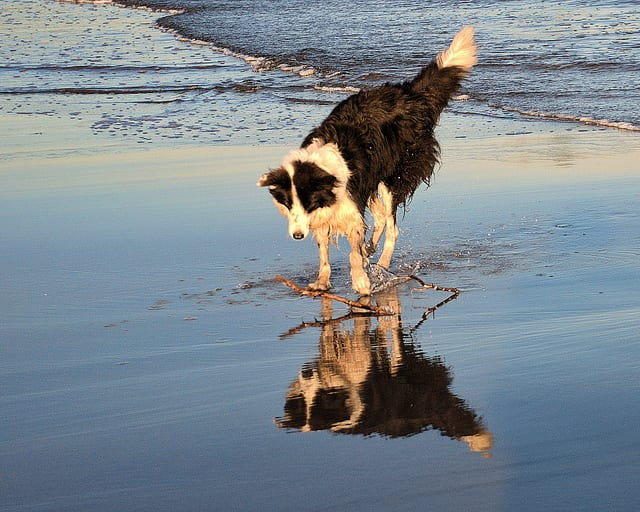

<p><span style="color: #ffcc99;">We can then generate a description using the generate_desc() function defined when evaluating the model.</span></p>

In [83]:
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
print(description)

startseq two dogs are running through the water endseq


<h2><span style="color: #ff0000;">two dogs hahaha</span></h2>